# Project T2 - IART 2023

## About

This project consists of supervised learning with the following steps: 
    - dataset analysis to check for the need for data
pre-processing, identification of the target concept, definition of the training and test sets, selection and
parameterization of the learning algorithms to employ, and evaluation of the learning process (in particular
on the test set). At least 3 supervised learning (classification) algorithms should be employed (Decision
Trees, Neural Networks, K-NN, SVM, ...)

In [1]:
# Imports

import pandas
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.tree as tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the data
df = pandas.read_csv("dataset.csv")

# Drop uneeded columns
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

# Print the first 5 rows of the data
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Print the number of rows and columns in the data
print(df.shape)

# Print the column names
print(df.columns)

# Print the mean of each column
print(df.mean(numeric_only=True))

# Print the median of each column
print(df.median(numeric_only=True))

# Print the standard deviation of each column
print(df.std(numeric_only=True))

# Print the correlation between each column
print(df.corr(numeric_only=True))

# Print the covariance between each column
print(df.cov(numeric_only=True))


(569, 31)
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
frac

In [4]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


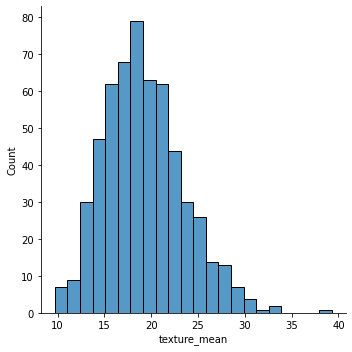

In [6]:
sb.displot(df['texture_mean'])

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
# save the cleaned data to a new file
df.to_csv('dataset_clean.csv', index=False)

# load the cleaned data
df = pandas.read_csv('dataset_clean.csv')

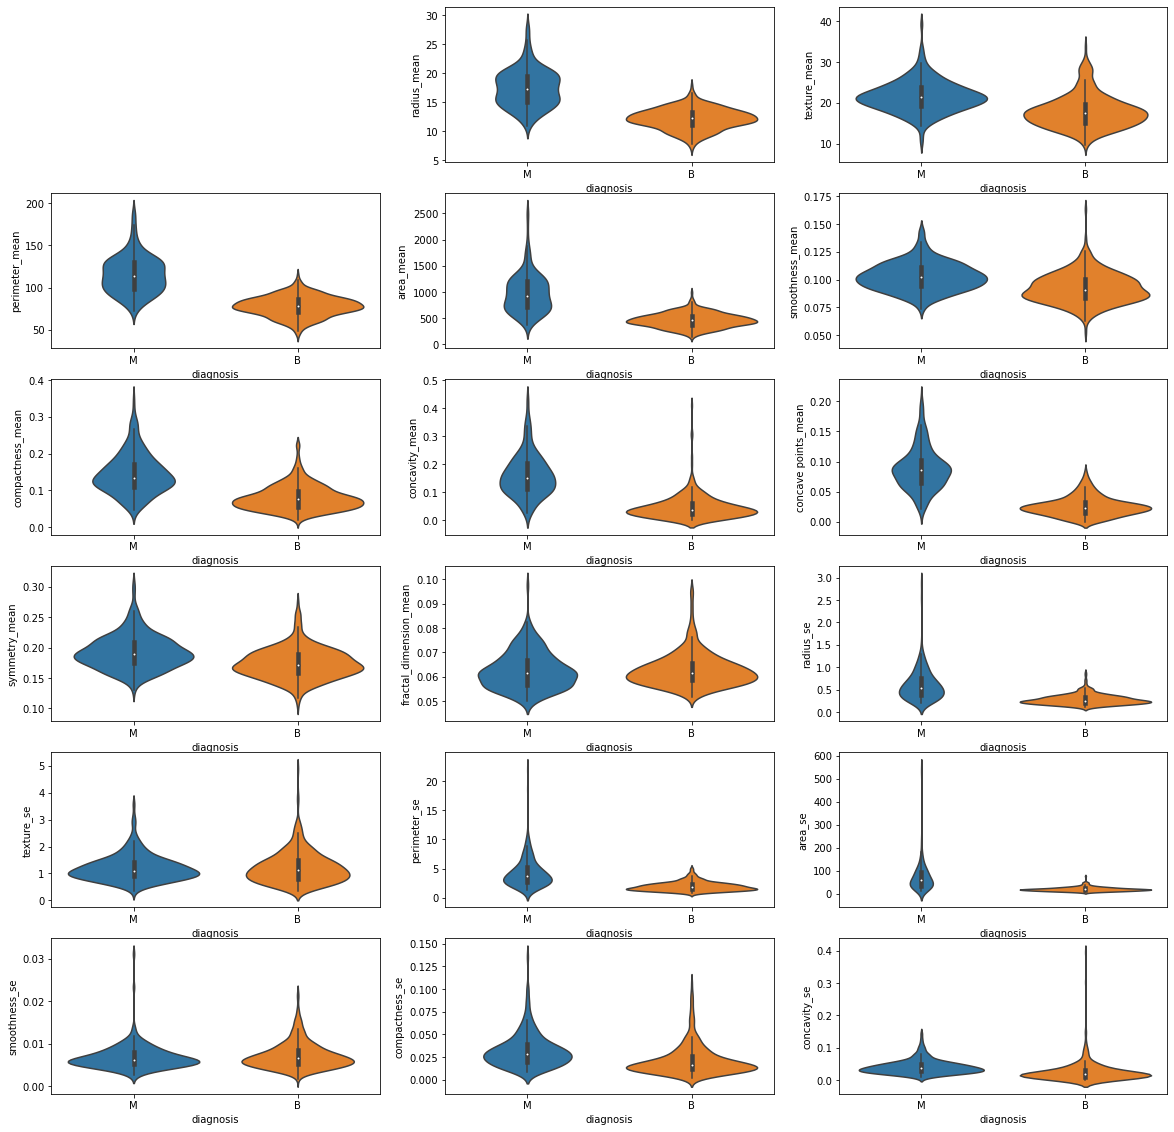

In [9]:
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(df.columns):
    try:
        if column == 'diagnosis':
            continue
        plt.subplot(6, 3, column_index + 1)
        sb.violinplot(x='diagnosis', y=column, data=df)
    except:
        pass

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

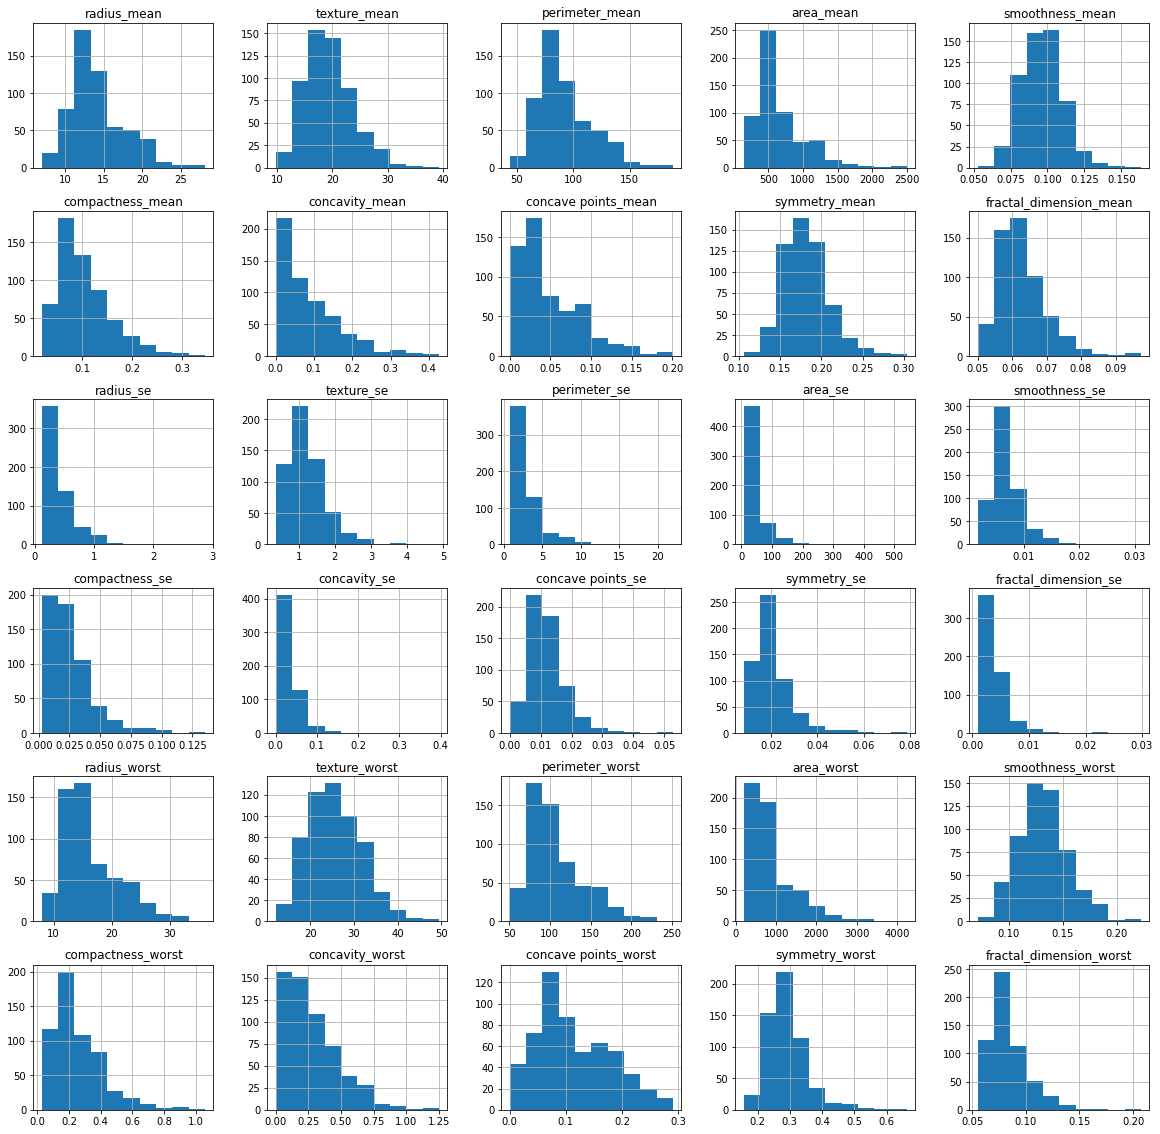

In [12]:
df.hist(figsize=(20,20))
# sb.displot(df['texture_mean'])

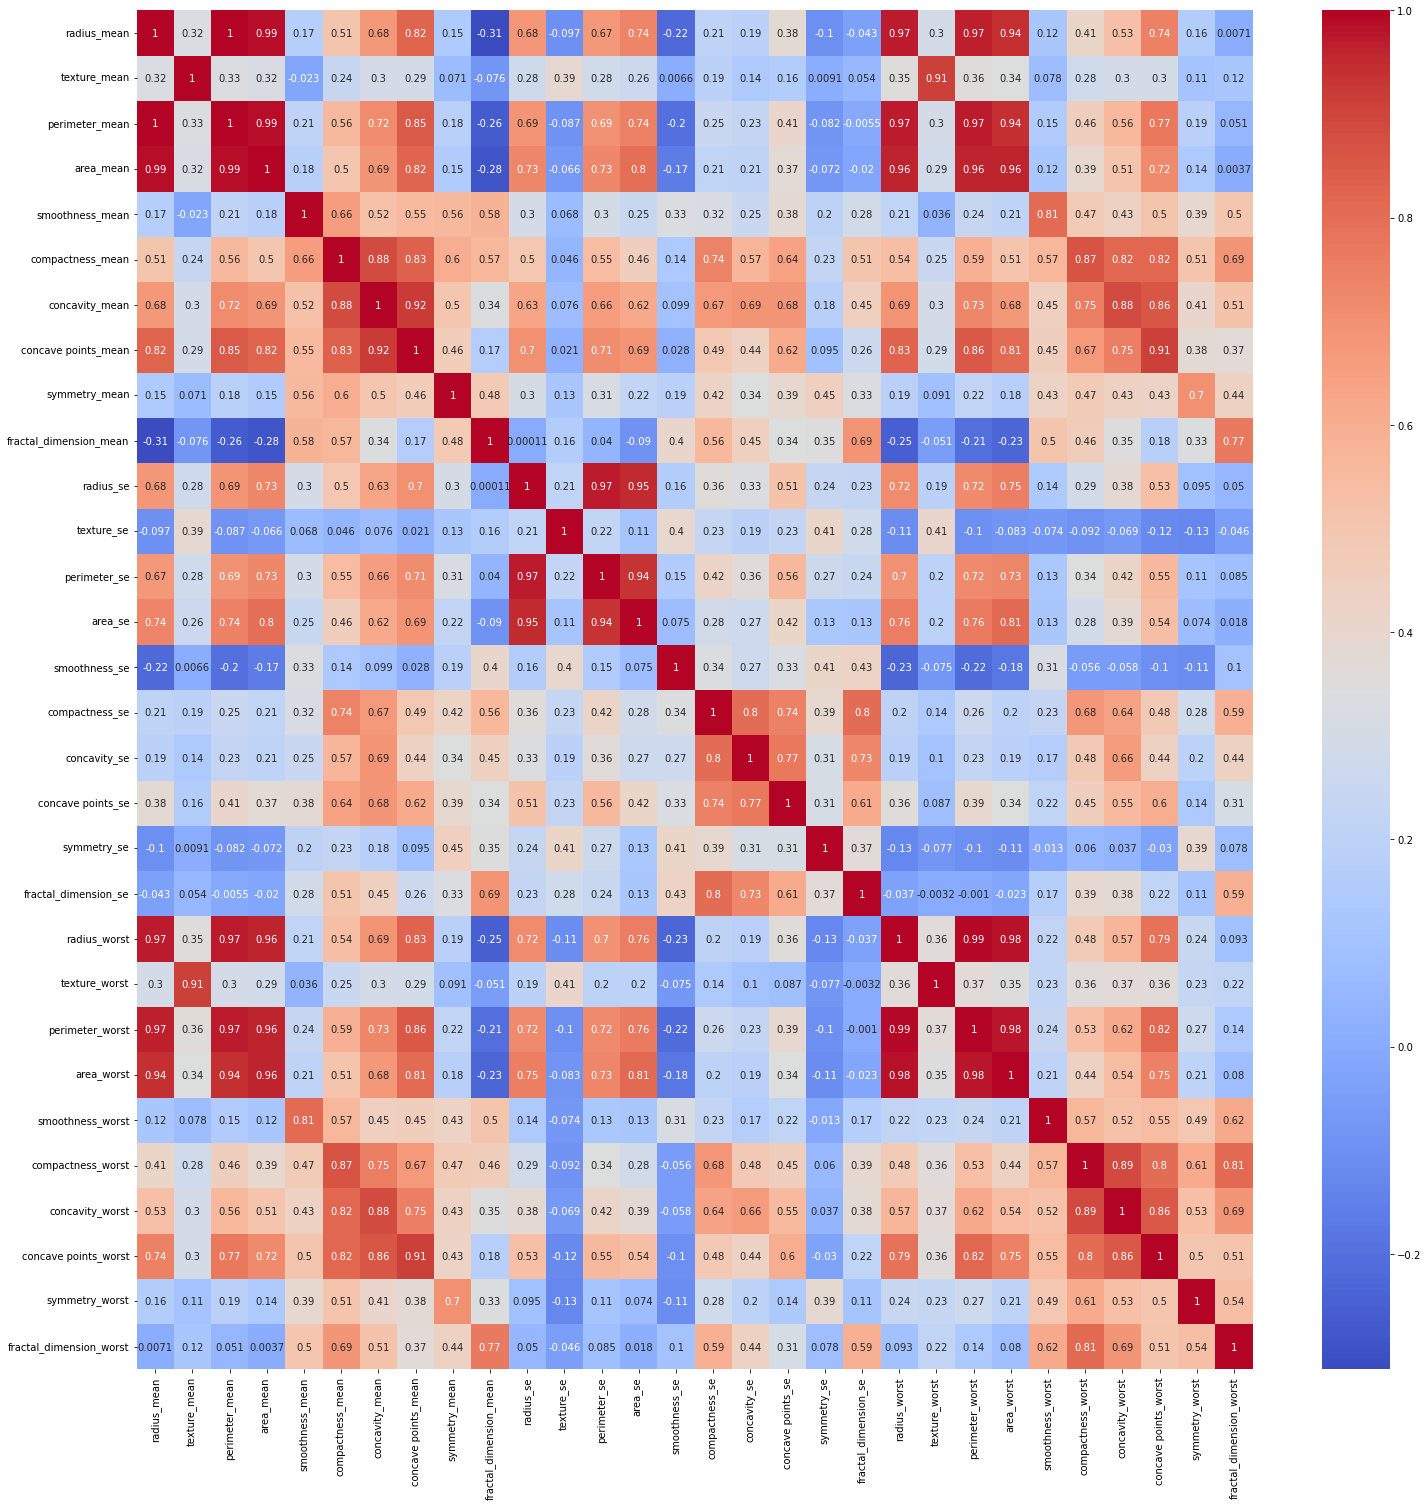

In [10]:
# calculate the correlation between each pair of columns
corr_matrix = df.corr(numeric_only=True)

# plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(25, 25))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [11]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

NameError: name 'all_inputs' is not defined

In [ ]:
# Checking null values
print(df.isna().sum())

# check number of values that are 0
print((df == 0).sum())

# solve the problem of 0 values by replacing them with the mean for each column
df = df.replace(0, np.NaN)
df = df.fillna(df.mean())

# check number of values that are 0
print((df == 0).sum()) 


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
diagnosis                   0
radius_mean                 0
texture_mean                

/tmp/ipykernel_18823/2194274523.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
# Threshold value to define the range for identifying outliers
threshold = 5

# Loop through all columns in the DataFrame, excluding the diagnosis
for column in df.loc[:, ~df.columns.isin(['diagnosis'])]:  
    
    # Mean and STD of the column
    mean = df[column].mean()
    std = df[column].std()

    # Lower and Upper limits
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std

    # Remove outliers
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [ ]:
# Swapping B and M for 0 and 1
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1})

In [ ]:
df.shape

(551, 31)

In [ ]:
# Threshold value to define the range for identifying outliers
threshold = 5

# Loop through all columns in the DataFrame, excluding the diagnosis
for column in df.loc[:, ~df.columns.isin(['diagnosis'])]:  
    
    # Mean and STD of the column
    mean = df[column].mean()
    std = df[column].std()

    # Lower and Upper limits
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std

    # Remove outliers
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [ ]:
x = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [ ]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(max_depth = 5, random_state = 0)
rf.fit(training_inputs, training_classes)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
pred = rf.predict(testing_inputs)

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(testing_classes, pred))

Accuracy: 0.0
